In [40]:
import pandas as pd
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 

In [10]:
from surprise import Reader
from sklearn.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [11]:
from surprise import Dataset
from surprise import accuracy

In [12]:
from surprise import Dataset
data = Dataset.load_builtin("ml-100k")

In [13]:
from surprise import Dataset, Reader
import csv

ratingsPath = '/Users/swatilathwal/Downloads/ratings.csv'
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(ratingsPath, reader=reader)

In [14]:
data

In [16]:
from surprise import SVD
from surprise import SVD,NormalPredictor
from surprise.model_selection import GridSearchCV

In [17]:
param_grid = {'n_factors':[50,100,150],'n_epochs':[20,30,40,50],  'lr_all':[0.005,0.01],'reg_all':[0.02,0.1]}

In [18]:
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

In [19]:
params = gs.best_params['rmse']
print(params)

{'n_factors': 150, 'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.1}


In [20]:
svdtuned = SVD(n_factors=150, n_epochs=30, lr_all=0.01, 
               reg_all=0.1)

In [23]:
trainset, testset = train_test_split(data, test_size=.20)

In [25]:
kf = KFold(n_splits=5)

for trainset, testset in kf.split(data):

    svdtuned.fit(trainset)
    predictions = svdtuned.test(testset)
    
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.8765
RMSE: 0.8747
RMSE: 0.8810
RMSE: 0.8748
RMSE: 0.8815


In [31]:
data = pd.read_table("/Users/swatilathwal/Downloads/u1.base", names = ['user', 'movie', 'ratings', 'timestamp'])  

In [43]:
data

,user,movie,ratings,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
79995,943,1067,2,875501756
79996,943,1074,4,888640250
79997,943,1188,3,888640250
79998,943,1228,3,888640275


In [38]:
data.ratings.value_counts()

4    27396
3    21963
5    16744
2     9178
1     4719
Name: ratings, dtype: int64

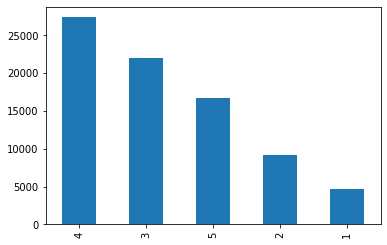

In [42]:
data.ratings.value_counts().plot(kind='bar')
plt.show()